In [12]:
import cv2
import os
import mtcnn
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model

from PIL import Image
import numpy as np
from skimage import transform
import imageio
import matplotlib.pyplot as plt

In [13]:
d = {'Aishu': 0,
 'Aswini': 1,
 'Kick': 2,
 'Nandana': 3,
 'Raji': 4,
 'Santhosh': 5,
 'Sathish': 6,
 'Sruthi': 7,
 'Suma': 8,
 'Surudhi': 9,
 'Swathi': 10,
 'Varma': 11,
 'Venky': 12,
 'Yoga': 13,
 'Unknown': 14}

In [14]:
key_list = list(d.keys())
val_list = list(d.values())

In [15]:
def draw_facebox(result_list,frame):
    x = result_list[0]
    y = result_list[1]
    w = result_list[2]
    h = result_list[3]

    face = frame[y:y+h,x:x+w]
    text = predict(face)
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 5)
    cv2.putText(frame, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)
    return frame

In [16]:
def predict(face):
    model = load_model("cnn_model.h5")
    np_image = np.array(face).astype('float32')/255
    np_image = transform.resize(np_image, (256, 256, 3))
    np_image = np.expand_dims(np_image, axis=0)
    pred = model.predict(np_image) 
    cls = model.predict_classes(np_image) 
    if pred[0][cls]:
        position = val_list.index(cls)
    else:
        position = val_list.index(19)
    return key_list[position]
    

In [17]:
def detect(frame, gray, count):
    detector = mtcnn.MTCNN()
    faces = detector.detect_faces(frame)
    print(faces)
    for i in faces:
        for key,value in i.items():
            if key == "box":
                print(value)
                draw_facebox(value,frame)
    plt.figure(figsize = (17, 17))
    plt.imshow(frame[:, :, ::-1])

In [18]:
def load_images_from_folder(folder):
    count = 0
    for f in os.listdir(folder):
        if (f.endswith(".jpg") or f.endswith(".png") or f.endswith(".JPG") or f.endswith(".jpeg") or f.endswith(".HEIC") or f.endswith(".heic")):
            img = cv2.imread(os.path.join(folder,f))
            print(f)
            count += 1
            
            if img is not None:
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                detect(img, gray, count)  

Group.jpg
[{'box': [975, 133, 75, 93], 'confidence': 0.9999978542327881, 'keypoints': {'left_eye': (997, 169), 'right_eye': (1033, 171), 'nose': (1013, 189), 'mouth_left': (996, 204), 'mouth_right': (1029, 206)}}, {'box': [745, 373, 87, 102], 'confidence': 0.999988317489624, 'keypoints': {'left_eye': (778, 412), 'right_eye': (819, 415), 'nose': (802, 430), 'mouth_left': (778, 450), 'mouth_right': (815, 453)}}, {'box': [1153, 395, 105, 126], 'confidence': 0.9999759197235107, 'keypoints': {'left_eye': (1177, 449), 'right_eye': (1222, 444), 'nose': (1196, 473), 'mouth_left': (1184, 496), 'mouth_right': (1224, 492)}}, {'box': [1167, 79, 77, 95], 'confidence': 0.9989506006240845, 'keypoints': {'left_eye': (1185, 116), 'right_eye': (1222, 116), 'nose': (1200, 132), 'mouth_left': (1184, 152), 'mouth_right': (1218, 152)}}, {'box': [328, 233, 99, 126], 'confidence': 0.9977371692657471, 'keypoints': {'left_eye': (364, 281), 'right_eye': (410, 280), 'nose': (393, 303), 'mouth_left': (370, 331), '

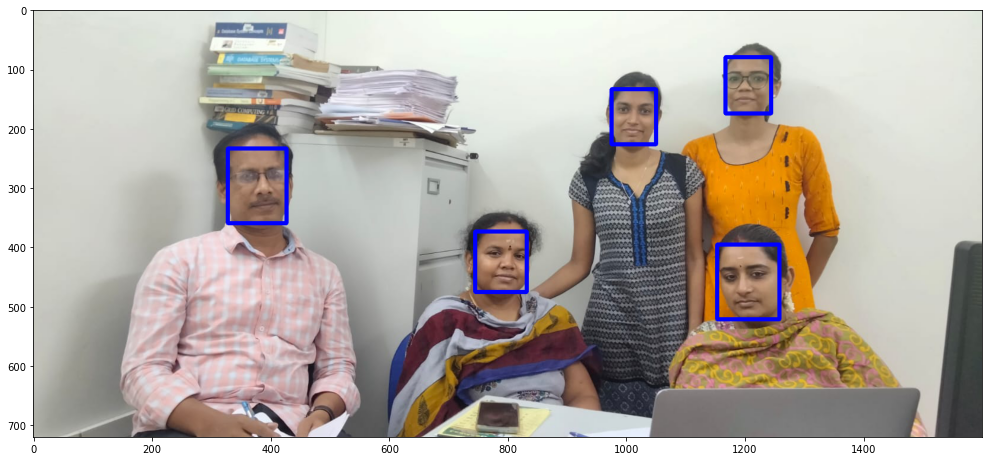

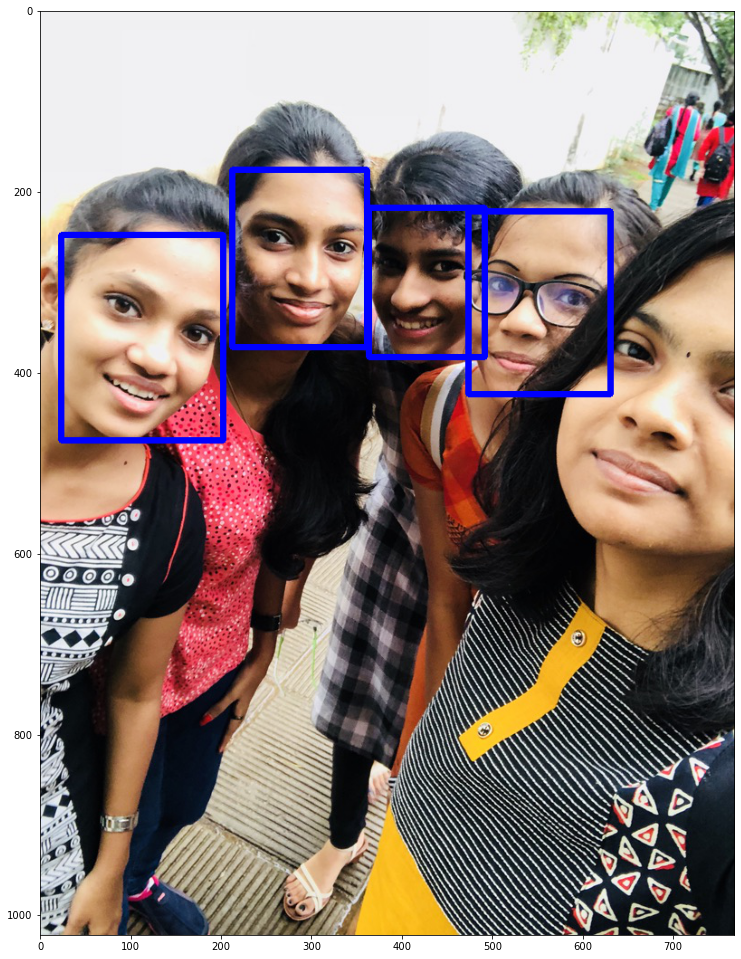

In [20]:
load_images_from_folder('Data/Custom/Split/Ph/grp')